### Team Members:

Carlee Allen - cea2475 <br>
Tanushree Balaji - tb33857 <br>
Snehal Naravane - sn27429 <br>
Juhi Patel - jpp2464 <br>
Aishwarya Rajeev - ar73945 <br>


# Washington Post

In [2]:
import instaloader
import  time
import  pandas as pd
from datetime import datetime
from itertools import dropwhile, takewhile

### Scraping

In [2]:
L = instaloader.Instaloader()
df=pd.DataFrame()
posts = instaloader.Profile.from_username(L.context, 'washingtonpost').get_posts()
i=0
for post in posts:
    df = df.append({'Caption': post.caption, 'Likes': post.likes, 'URL': post.url  }, ignore_index=True)
    df.to_excel("washingtonpost.xls",index=False)
    i = i+1
    if i>500:
        break
print("Written to washingtonpost.xls file")
df['URL'].to_excel("washingtonpostpics.xls",index=False,header=False)

/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/756245391.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Caption': post.caption, 'Likes': post.likes, 'URL': post.url  }, ignore_index=True)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/756245391.py:7: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel("washingtonpost.xls",index=False)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/756245391.py:6: FutureWarning: The frame.append

Written to washingtonpost.xls file


/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/756245391.py:7: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel("washingtonpost.xls",index=False)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/756245391.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Caption': post.caption, 'Likes': post.likes, 'URL': post.url  }, ignore_index=True)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/756245391.py:7: FutureWarning: As the xlwt pack

### Image Analytics

In [3]:
import xlrd
from google.cloud import vision
import os
import pandas as pd

Application_Credentials = 'my_project.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = Application_Credentials
client = vision.ImageAnnotatorClient()
image = vision.Image()

loc = ("washingtonpostpics.xls")
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)
sheet.cell_value(0, 0)
df_imagelabels = pd.DataFrame()
# loop through every url, retreive the image and send to google vision
for i in range(sheet.nrows):
    image_src_temp = sheet.cell_value(i, 0)
    image.source.image_uri = image_src_temp
    response = client.label_detection(image=image)
    labels = response.label_annotations
    l = []
    for label in labels:
        l.append(label.description)
    s = ' '.join(l)
    df_imagelabels = df_imagelabels.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
df_imagelabels.to_excel("labels.xlsx",index=False)

/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/2131446818.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_imagelabels = df_imagelabels.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/2131446818.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_imagelabels = df_imagelabels.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/2131446818.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_imagelabels = df_imagelabels.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel

In [4]:
df['image_labels']=df_imagelabels['Labels']

In [5]:
df['combined'] = df['image_labels'] + ' ' + df['Caption']

In [7]:
df.to_excel("df_withlabels.xlsx",index=False)

In [3]:
import os, csv, nltk, lda
import pandas as pd
import numpy as np
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import PunktSentenceTokenizer,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tanushreedevi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tanushreedevi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tanushreedevi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tanushreedevi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Topic Modelling -  Only Images

In [17]:
#!/usr/bin/python3.6
#Install LDA library if not already installed
# pip3.6 install --user lda
# the input file is natgeo_labels_2020.xlsx
# there are two output files: topic_word_dist.xlsx and document_topic_dist.xlsx
# the script prompts for the name of the columns -- Restaurant_name and Restaurant_review in the yelp_reviews.xslx file

df=pd.read_excel("washingtonpost_df_withlabels.xlsx")
reviews_df=df

#checking for nulls if present any
print("Number of rows with any of the empty columns:")
print(reviews_df.isnull().sum().sum())
reviews_df=reviews_df.dropna()
reviews_df.index.name = 'postnum'
reviews_df.reset_index(inplace=True)


restaurant_name = reviews_df['postnum']
restaurant_review = reviews_df['image_labels']
ntopics= 3


word_tokenizer=RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_nltk=set(stopwords.words('english'))


def tokenize_text(version_desc):
    lowercase=version_desc.lower()
    text = wordnet_lemmatizer.lemmatize(lowercase)
    tokens = word_tokenizer.tokenize(text)
    return tokens

vec_words = CountVectorizer(tokenizer=tokenize_text,stop_words=stopwords_nltk,decode_error='ignore')
total_features_words = vec_words.fit_transform(restaurant_review)

print(total_features_words.shape)

model = lda.LDA(n_topics=int(ntopics), n_iter=500, random_state=1)
model.fit(total_features_words)

topic_word = model.topic_word_
doc_topic=model.doc_topic_
doc_topic=pd.DataFrame(doc_topic)
reviews_df=reviews_df.join(doc_topic)
restaurant=pd.DataFrame()

for i in range(int(ntopics)):
    topic="topic_"+str(i)
    restaurant[topic]=reviews_df.groupby([restaurant_name])[i].mean()

restaurant=restaurant.reset_index()
restaurant['labels'] = reviews_df['image_labels']
restaurant['likes'] = reviews_df['Likes']
topics=pd.DataFrame(topic_word)
topics.columns=vec_words.get_feature_names()
topics1=topics.transpose()
print ("Topics word distribution written in file topic_word_dist.xlsx ")
topics1.to_excel("topic_word_dist_image.xlsx")
restaurant.to_excel("document_topic_dist_image.xlsx",index=False)
print ("Document topic distribution written in file document_topic_dist.xlsx ")


/Users/tanushreedevi/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn(
INFO:lda:n_documents: 500
INFO:lda:vocab_size: 686
INFO:lda:n_words: 5689
INFO:lda:n_topics: 3
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -43563
INFO:lda:<10> log likelihood: -33458
INFO:lda:<20> log likelihood: -32321
INFO:lda:<30> log likelihood: -32006
INFO:lda:<40> log likelihood: -31959
INFO:lda:<50> log likelihood: -31967
INFO:lda:<60> log likelihood: -31992


Number of rows with any of the empty columns:
1
(500, 686)


INFO:lda:<70> log likelihood: -31927
INFO:lda:<80> log likelihood: -32038
INFO:lda:<90> log likelihood: -31795
INFO:lda:<100> log likelihood: -31745
INFO:lda:<110> log likelihood: -31724
INFO:lda:<120> log likelihood: -31666
INFO:lda:<130> log likelihood: -31740
INFO:lda:<140> log likelihood: -31793
INFO:lda:<150> log likelihood: -31711
INFO:lda:<160> log likelihood: -31718
INFO:lda:<170> log likelihood: -31760
INFO:lda:<180> log likelihood: -31690
INFO:lda:<190> log likelihood: -31646
INFO:lda:<200> log likelihood: -31701
INFO:lda:<210> log likelihood: -31669
INFO:lda:<220> log likelihood: -31720
INFO:lda:<230> log likelihood: -31721
INFO:lda:<240> log likelihood: -31654
INFO:lda:<250> log likelihood: -31785
INFO:lda:<260> log likelihood: -31696
INFO:lda:<270> log likelihood: -31701
INFO:lda:<280> log likelihood: -31734
INFO:lda:<290> log likelihood: -31718
INFO:lda:<300> log likelihood: -31693
INFO:lda:<310> log likelihood: -31785
INFO:lda:<320> log likelihood: -31782
INFO:lda:<330> 

Topics word distribution written in file topic_word_dist.xlsx 
Document topic distribution written in file document_topic_dist.xlsx 


# CNN

### Scraping

In [12]:
L = instaloader.Instaloader()
df=pd.DataFrame()
posts = instaloader.Profile.from_username(L.context, 'cnn').get_posts()
i=0
for post in posts:
    df = df.append({'Caption': post.caption, 'Likes': post.likes, 'URL': post.url  }, ignore_index=True)
    df.to_excel("cnn.xls",index=False)
    i = i+1
    if i>500:
        break
df['URL'].to_excel("cnnpics.xls",index=False,header=False)

/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/2090659131.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Caption': post.caption, 'Likes': post.likes, 'URL': post.url  }, ignore_index=True)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/2090659131.py:7: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel("cnn.xls",index=False)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/2090659131.py:6: FutureWarning: The frame.append method 

### Image Analytics

In [13]:
import xlrd
from google.cloud import vision
import os
import pandas as pd

Application_Credentials = 'my_project.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = Application_Credentials
client = vision.ImageAnnotatorClient()
image = vision.Image()

loc = ("cnnpics.xls")
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)
sheet.cell_value(0, 0)
df_imagelabels = pd.DataFrame()
# loop through every url, retreive the image and send to google vision
for i in range(sheet.nrows):
    image_src_temp = sheet.cell_value(i, 0)
    image.source.image_uri = image_src_temp
    response = client.label_detection(image=image)
    labels = response.label_annotations
    l = []
    for label in labels:
        l.append(label.description)
    s = ' '.join(l)
    df_imagelabels = df_imagelabels.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
df_imagelabels.to_excel("labels.xlsx",index=False)

/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/1580749729.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_imagelabels = df_imagelabels.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/1580749729.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_imagelabels = df_imagelabels.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/1580749729.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_imagelabels = df_imagelabels.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel

ServiceUnavailable: 503 Connection reset by peer

In [14]:
df['image_labels']=df_imagelabels['Labels']
df['combined'] = df['image_labels'] + ' ' + df['Caption']
df.to_excel("df_withlabels.xlsx",index=False)

### Topic Modelling - Only Images 

In [16]:
#!/usr/bin/python3.6
#Install LDA library if not already installed
# pip3.6 install --user lda
# the input file is natgeo_labels_2020.xlsx
# there are two output files: topic_word_dist.xlsx and document_topic_dist.xlsx
# the script prompts for the name of the columns -- Restaurant_name and Restaurant_review in the yelp_reviews.xslx file

df = pd.read_excel("cnn_df_withlabels.xlsx")
reviews_df=df

#checking for nulls if present any
print("Number of rows with any of the empty columns:")
print(reviews_df.isnull().sum().sum())
reviews_df=reviews_df.dropna()
reviews_df.index.name = 'postnum'
reviews_df.reset_index(inplace=True)


restaurant_name = reviews_df['postnum']
restaurant_review = reviews_df['image_labels']
ntopics= 3


word_tokenizer=RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_nltk=set(stopwords.words('english'))


def tokenize_text(version_desc):
    lowercase=version_desc.lower()
    text = wordnet_lemmatizer.lemmatize(lowercase)
    tokens = word_tokenizer.tokenize(text)
    return tokens

vec_words = CountVectorizer(tokenizer=tokenize_text,stop_words=stopwords_nltk,decode_error='ignore')
total_features_words = vec_words.fit_transform(restaurant_review)

print(total_features_words.shape)

model = lda.LDA(n_topics=int(ntopics), n_iter=500, random_state=1)
model.fit(total_features_words)

topic_word = model.topic_word_
doc_topic=model.doc_topic_
doc_topic=pd.DataFrame(doc_topic)
reviews_df=reviews_df.join(doc_topic)
restaurant=pd.DataFrame()

for i in range(int(ntopics)):
    topic="topic_"+str(i)
    restaurant[topic]=reviews_df.groupby([restaurant_name])[i].mean()

restaurant=restaurant.reset_index()
restaurant['labels'] = reviews_df['image_labels']
restaurant['likes'] = reviews_df['Likes']
topics=pd.DataFrame(topic_word)
topics.columns=vec_words.get_feature_names()
topics1=topics.transpose()
print ("Topics word distribution written in file topic_word_dist.xlsx ")
topics1.to_excel("topic_word_dist_image.xlsx")
restaurant.to_excel("document_topic_dist_image.xlsx",index=False)
print ("Document topic distribution written in file document_topic_dist.xlsx ")


/Users/tanushreedevi/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn(
INFO:lda:n_documents: 248
INFO:lda:vocab_size: 534
INFO:lda:n_words: 3038
INFO:lda:n_topics: 3
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -24867
INFO:lda:<10> log likelihood: -19272
INFO:lda:<20> log likelihood: -18717
INFO:lda:<30> log likelihood: -18452
INFO:lda:<40> log likelihood: -18313
INFO:lda:<50> log likelihood: -18215
INFO:lda:<60> log likelihood: -18166


Number of rows with any of the empty columns:
506
(248, 534)


INFO:lda:<70> log likelihood: -18125
INFO:lda:<80> log likelihood: -18060
INFO:lda:<90> log likelihood: -18064
INFO:lda:<100> log likelihood: -18056
INFO:lda:<110> log likelihood: -18093
INFO:lda:<120> log likelihood: -18065
INFO:lda:<130> log likelihood: -18088
INFO:lda:<140> log likelihood: -18081
INFO:lda:<150> log likelihood: -18072
INFO:lda:<160> log likelihood: -18026
INFO:lda:<170> log likelihood: -18035
INFO:lda:<180> log likelihood: -18024
INFO:lda:<190> log likelihood: -18015
INFO:lda:<200> log likelihood: -17988
INFO:lda:<210> log likelihood: -18046
INFO:lda:<220> log likelihood: -17993
INFO:lda:<230> log likelihood: -18048
INFO:lda:<240> log likelihood: -18023
INFO:lda:<250> log likelihood: -18023
INFO:lda:<260> log likelihood: -18042
INFO:lda:<270> log likelihood: -18046
INFO:lda:<280> log likelihood: -17991
INFO:lda:<290> log likelihood: -18007
INFO:lda:<300> log likelihood: -18014
INFO:lda:<310> log likelihood: -18020
INFO:lda:<320> log likelihood: -18020
INFO:lda:<330> 

Topics word distribution written in file topic_word_dist.xlsx 
Document topic distribution written in file document_topic_dist.xlsx 


# NY Times

In [17]:
L = instaloader.Instaloader()
df=pd.DataFrame()
posts = instaloader.Profile.from_username(L.context, 'nytimes').get_posts()
i=0
for post in posts:
    df = df.append({'Caption': post.caption, 'Likes': post.likes, 'URL': post.url  }, ignore_index=True)
    df.to_excel("nytimes.xls",index=False)
    i = i+1
    if i>500:
        break
df['URL'].to_excel("nytimespics.xls",index=False,header=False)

/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/3378087176.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Caption': post.caption, 'Likes': post.likes, 'URL': post.url  }, ignore_index=True)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/3378087176.py:7: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel("nytimes.xls",index=False)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/3378087176.py:6: FutureWarning: The frame.append met

In [18]:
import xlrd
from google.cloud import vision
import os
import pandas as pd

Application_Credentials = 'my_project.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = Application_Credentials
client = vision.ImageAnnotatorClient()
image = vision.Image()

loc = ("nytimespics.xls")
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)
sheet.cell_value(0, 0)
df_imagelabels = pd.DataFrame()
# loop through every url, retreive the image and send to google vision
for i in range(sheet.nrows):
    image_src_temp = sheet.cell_value(i, 0)
    image.source.image_uri = image_src_temp
    response = client.label_detection(image=image)
    labels = response.label_annotations
    l = []
    for label in labels:
        l.append(label.description)
    s = ' '.join(l)
    df_imagelabels = df_imagelabels.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
df_imagelabels.to_excel("labels.xlsx",index=False)

/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/1202880077.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_imagelabels = df_imagelabels.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/1202880077.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_imagelabels = df_imagelabels.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel_90366/1202880077.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_imagelabels = df_imagelabels.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
/var/folders/_j/hp54sf295b9bd0bczykcmwvm0000gn/T/ipykernel

In [19]:
df['image_labels']=df_imagelabels['Labels']
df['combined'] = df['image_labels'] + ' ' + df['Caption']
df.to_excel("df_withlabels.xlsx",index=False)

### Topic Modelling - Images Only

In [15]:
#!/usr/bin/python3.6
#Install LDA library if not already installed
# pip3.6 install --user lda
# the input file is natgeo_labels_2020.xlsx
# there are two output files: topic_word_dist.xlsx and document_topic_dist.xlsx
# the script prompts for the name of the columns -- Restaurant_name and Restaurant_review in the yelp_reviews.xslx file

df = pd.read_excel("nytimes_df_withlabels.xlsx")
reviews_df=df

#checking for nulls if present any
print("Number of rows with any of the empty columns:")
print(reviews_df.isnull().sum().sum())
reviews_df=reviews_df.dropna()
reviews_df.index.name = 'postnum'
reviews_df.reset_index(inplace=True)


restaurant_name = reviews_df['postnum']
restaurant_review = reviews_df['image_labels']
ntopics= 5


word_tokenizer=RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_nltk=set(stopwords.words('english'))


def tokenize_text(version_desc):
    lowercase=version_desc.lower()
    text = wordnet_lemmatizer.lemmatize(lowercase)
    tokens = word_tokenizer.tokenize(text)
    return tokens

vec_words = CountVectorizer(tokenizer=tokenize_text,stop_words=stopwords_nltk,decode_error='ignore')
total_features_words = vec_words.fit_transform(restaurant_review)

print(total_features_words.shape)

model = lda.LDA(n_topics=int(ntopics), n_iter=500, random_state=1)
model.fit(total_features_words)

topic_word = model.topic_word_
doc_topic=model.doc_topic_
doc_topic=pd.DataFrame(doc_topic)
reviews_df=reviews_df.join(doc_topic)
restaurant=pd.DataFrame()

for i in range(int(ntopics)):
    topic="topic_"+str(i)
    restaurant[topic]=reviews_df.groupby([restaurant_name])[i].mean()

restaurant=restaurant.reset_index()
topics=pd.DataFrame(topic_word)
topics.columns=vec_words.get_feature_names()
topics1=topics.transpose()
restaurant['labels'] = reviews_df['image_labels']
restaurant['likes'] = reviews_df['Likes']
print ("Topics word distribution written in file topic_word_dist.xlsx ")
topics1.to_excel("topic_word_dist_image.xlsx")
restaurant.to_excel("document_topic_dist_image.xlsx",index=False)
print ("Document topic distribution written in file document_topic_dist.xlsx ")


/Users/tanushreedevi/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn(
INFO:lda:n_documents: 500
INFO:lda:vocab_size: 764
INFO:lda:n_words: 5573
INFO:lda:n_topics: 5
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -51309
INFO:lda:<10> log likelihood: -35746
INFO:lda:<20> log likelihood: -34352
INFO:lda:<30> log likelihood: -33839
INFO:lda:<40> log likelihood: -33512
INFO:lda:<50> log likelihood: -33418
INFO:lda:<60> log likelihood: -33298


Number of rows with any of the empty columns:
2
(500, 764)


INFO:lda:<70> log likelihood: -33345
INFO:lda:<80> log likelihood: -33314
INFO:lda:<90> log likelihood: -33222
INFO:lda:<100> log likelihood: -33244
INFO:lda:<110> log likelihood: -33236
INFO:lda:<120> log likelihood: -33216
INFO:lda:<130> log likelihood: -33196
INFO:lda:<140> log likelihood: -33169
INFO:lda:<150> log likelihood: -33139
INFO:lda:<160> log likelihood: -33203
INFO:lda:<170> log likelihood: -33203
INFO:lda:<180> log likelihood: -33121
INFO:lda:<190> log likelihood: -33178
INFO:lda:<200> log likelihood: -33074
INFO:lda:<210> log likelihood: -33079
INFO:lda:<220> log likelihood: -33151
INFO:lda:<230> log likelihood: -33110
INFO:lda:<240> log likelihood: -33138
INFO:lda:<250> log likelihood: -33165
INFO:lda:<260> log likelihood: -33131
INFO:lda:<270> log likelihood: -33108
INFO:lda:<280> log likelihood: -33085
INFO:lda:<290> log likelihood: -33077
INFO:lda:<300> log likelihood: -33116
INFO:lda:<310> log likelihood: -33159
INFO:lda:<320> log likelihood: -33112
INFO:lda:<330> 

Topics word distribution written in file topic_word_dist.xlsx 
Document topic distribution written in file document_topic_dist.xlsx 


# Word Cloud

In [1]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
data1 = pd.read_excel("cnn_df_withlabels.xlsx")
data2 = pd.read_excel("nytimes_df_withlabels.xlsx")
data3 = pd.read_excel("washingtonpost_df_withlabels.xlsx")

In [2]:
combined_df = pd.concat([data1, data2,data3])

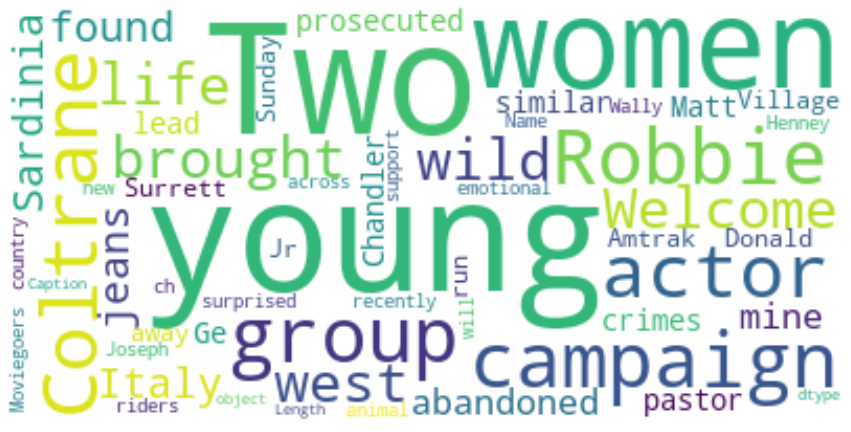

In [3]:
text = str(combined_df.Caption)
stopwords = set(STOPWORDS)
stopwords.add('S')
stopwords.add('n')
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()